In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralCoclustering
from matplotlib import pyplot as plt

In [2]:
my_dict = {0: 'SexF', 1: 'SexM', 2: 'Bebe', 3: 'Crianca', 4: 'Jovem', 5: 'Adulto', 6: 'Idoso', 7: 'Muito_idoso', 
           8: 'Conf_Mar', 9: 'Conf_Abr', 10: 'Conf_Mai', 11: 'Conf_Jun', 12: 'Conf_Jul', 13: 'Conf_Ago', 
           14: 'Conf_Set', 15: 'Sint_Mar', 16: 'Sint_Abr', 17: 'Sint_Mai', 18: 'Sint_Jun', 19: 'Sint_Jul', 
           20: 'Sint_Ago', 21: 'Sint_Set', 22: 'Evo_Rec', 23: 'Evo_Obito', 24: 'Evo_Aco', 25: 'Hosp_S', 26: 'Hosp_N', 
           27: 'Febre_S', 28: 'Febre_N', 29: 'Tosse_S', 30: 'Tosse_N', 31: 'Garganta_S', 32: 'Garganta_N', 33: 'Dispneia_S', 
           34: 'Dispneia_N', 35: 'Asma_S', 36: 'Asma_N', 37: 'DRespiratoria_S', 38: 'DRespiratoria_N', 39: 'DNeurologia_S', 
           40: 'DNeurologia_N', 41: 'Diabetes_S', 42: 'Diabetes_N', 43: 'Imunodef_S', 44: 'Imunodef_N', 45: 'DRenal_S', 
           46: 'DRenal_N', 47: 'DHepatica_S', 48: 'DHepatica_N', 49: 'DCardiaca_S', 50: 'DCardiaca_N', 51: 'Obesidade_S', 
           52: 'Obesidade_N'}
document_names = list()
for key, value in my_dict.items():
    document_names.append(value)

In [3]:
data = pd.read_csv('input_new.csv', header=None, sep=' ').to_numpy()

## Original Dataset

Text(0.5, 1.0, 'Original dataset')

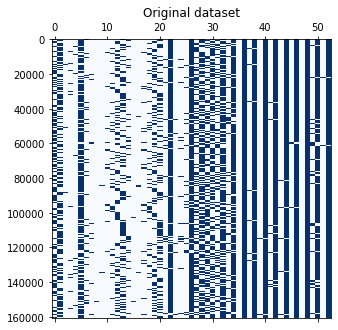

In [4]:
plt.figure(figsize=(5,5))
plt.matshow(data, cmap=plt.cm.Blues, aspect="auto", fignum=1)
plt.title("Original dataset")

### Shuffle dataset

In [ ]:
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.figure(figsize=(10,10))
plt.matshow(data, cmap=plt.cm.Blues, aspect="auto",  fignum=1)
plt.title("Shuffled dataset")

In [5]:
clustering = SpectralCoclustering(n_clusters=6, random_state=0)
clustering.fit(data)

SpectralCoclustering(n_clusters=6, random_state=0)

In [ ]:
clustering.row_labels_

In [ ]:
clustering.column_labels_

In [ ]:
clustering

In [ ]:
clustering.get_indices(3)

In [ ]:
clustering.get_params()

In [ ]:
clustering.get_shape(3)[0]

In [ ]:
clustering.get_submatrix(2, data)

In [6]:
for i in range(len(clustering.rows_)):
    print(f'Cluster: {i+1} -> ({clustering.get_shape(i)[0]})')
    print("Atributos: ", end=' ')
    for e in clustering.get_indices(i)[1]:
        print(document_names[int(e)], end=', ')
    print('\n')

Cluster: 1 -> (88075)
Atributos:  SexF, SexM, Bebe, Crianca, Jovem, Conf_Jul, Conf_Ago, Sint_Jul, Sint_Ago, Evo_Rec, Hosp_N, Febre_N, Tosse_N, Garganta_N, Dispneia_N, Asma_N, DRespiratoria_N, DNeurologia_N, Diabetes_N, Imunodef_N, DRenal_N, DHepatica_N, DCardiaca_N, Obesidade_N, 

Cluster: 2 -> (8684)
Atributos:  Conf_Set, Sint_Set, Evo_Aco, 

Cluster: 3 -> (13878)
Atributos:  Conf_Mar, Conf_Abr, Conf_Mai, Conf_Jun, Sint_Mar, Sint_Abr, Sint_Mai, Sint_Jun, 

Cluster: 4 -> (7580)
Atributos:  Idoso, Muito_idoso, Evo_Obito, Hosp_S, Dispneia_S, Asma_S, DNeurologia_S, Diabetes_S, Imunodef_S, DRenal_S, DHepatica_S, DCardiaca_S, Obesidade_S, 

Cluster: 5 -> (23080)
Atributos:  Adulto, 

Cluster: 6 -> (19643)
Atributos:  Febre_S, Tosse_S, Garganta_S, DRespiratoria_S, 



In [7]:
clusters = 6
DhillonCocluster = SpectralCoclustering(n_clusters = clusters, random_state = 0)
DhillonCocluster.fit(data)

reconstructed_matrix = np.zeros(data.shape,dtype=int)
for nc in range(clusters):
    if len(DhillonCocluster.get_indices(nc)[0]) != 0 and len(DhillonCocluster.get_indices(nc)[1]) != 0:
        for i in DhillonCocluster.get_indices(nc)[0]:#Indices of rows in the dataset that belong to the bicluster.
            for j in DhillonCocluster.get_indices(nc)[1]:#Indices of columns in the dataset that belong to the bicluster.
                reconstructed_matrix[i][j] = 1

Text(0.5, 1.0, 'Dhillon output')

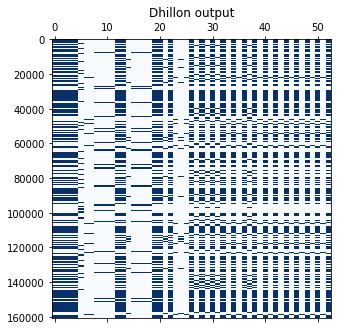

In [8]:
plt.figure(figsize=(5,5))
plt.matshow(reconstructed_matrix, cmap=plt.cm.Blues, aspect="auto", fignum=1)
plt.title("Dhillon output")

In [ ]:
my_dict

In [ ]:
r = DhillonCocluster.rows_
c = DhillonCocluster.columns_
r

In [ ]:
df_fimi = pd.read_csv(file, header=None, names=["transation"])
columnClusters,rowClusters = processDocument(df_fimi)
del df_fimi

In [ ]:
def processDocument(file):
    #print("Executing processDocument() method.")
    size_df = file.shape
    uniqueP = []
    uniqueT = []
    pois_per_cluster = []
    trajs_per_cluster = []
    change = 0
    
    for i in range(size_df[0]):#number of transations
        transationString = file.transation[i].split(' ')
#         print(transationString)
        pois = []
        trajs = []
        for j in range(len(transationString)):
            try:
                tmp = int(transationString[j])
            except:
                tmp = ''
            
            if change == 0:
                if type(tmp) is int:
                    if transationString[j] not in uniqueP:
                        uniqueP.append(transationString[j])
#                         if not pois: # empty
                    pois.append(transationString[j])
#                         print(transationString[j],end="|")
                else:
    #                 print("NO",end=" | ")
                    change = 1
#                     print("")
            else:
                if type(tmp) is int:
                    if transationString[j] not in uniqueT:
                        uniqueT.append(transationString[j])
                    trajs.append(transationString[j])
                else:
    #                 print("NO",end=" | ")
                    if change == 1:
                        change = 2
                        tmp = re.split('\[| |\]',transationString[j])
                        #print("1-tmp:"+str(tmp))
                        if tmp[1] not in uniqueT:
                            uniqueT.append(tmp[1])
                        trajs.append(tmp[1])
                    else:
                        tmp = re.split('\[| |\]',transationString[j])
                        #print("2-tmp:"+str(tmp))
                        if tmp[0] not in uniqueT:
                            uniqueT.append(tmp[0])
                        trajs.append(tmp[0])
                        change = 0
        pois_per_cluster.append(pois)
        trajs_per_cluster.append(trajs)

#     print('Number of unique elements: ',len(uniqueElements))
#     print("P per Clusters: "+str(pois_per_cluster))
#     print("T per Clusters: "+str(trajs_per_cluster))
    return pois_per_cluster,trajs_per_cluster

In [ ]:
def check_result(columnClusters,rowClusters):
    nc = len(columnClusters)
    for i in range(nc):
        num_objects = len(set(rowClusters[i]))
        print("Cluster-"+str(i+1)+" ("+str(num_objects)+")")
        print("Atributos: ",end="")
        for ele in columnClusters[i]:
            print(my_dict[int(ele)],end=", ")

#         print("\nSobreposição de OBJETOS em outros clusters.")
#         for j in range(nc):
#             if i != j:
#                 print("    Cluster "+str(j+1)+": ",end="")
# #                 clusB = len(set(rowClusters[i]))
#                 qtd_intersect = len(set(rowClusters[j]).intersection(set(rowClusters[i])))
# #                 overlap = ((num_objects-(num_objects-qtd_intersect))/len(set(rowClusters[i]).union(set(rowClusters[j]))))*100
#                 overlap = ((num_objects-(num_objects-qtd_intersect))/num_objects)*100
# #                 overlap = ((cluSize-(cluSize-qtd_intersect)))*100
#                 print("{0:.2f}% ({1:d})".format(overlap,qtd_intersect))
#         print("\n")
    

In [ ]:
columnClusters,rowClusters = processDocument(data)

In [ ]:
check_result(columnClusters, rowClusters)

In [ ]:
def bicluster_ncut(i):
    rows, cols = DhillonCocluster.get_indices(i)
    if not (np.any(rows) and np.any(cols)):
        import sys
        return sys.float_info.max
    row_complement = np.nonzero(np.logical_not(DhillonCocluster.rows_[i]))[0]
    col_complement = np.nonzero(np.logical_not(DhillonCocluster.columns_[i]))[0]
    
    weight = data[rows][:, cols].sum()
    cut = (data[row_complement][:, cols].sum() +
           data[rows][:, col_complement].sum())
    return cut / weight

bicluster_ncuts = list(reconstructed_matrix
                       for i in range(len(my_dict)))
best_idx = np.argsort(bicluster_ncuts)[:6]

def most_common(d):
    """Items of a defaultdict(int) with the highest values.

    Like Counter.most_common in Python >=2.7.
    """
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)


In [ ]:
len(my_dict)

In [ ]:
from collections import defaultdict

print("Best biclusters:")
print("----------------")
for idx, cluster in enumerate(best_idx):
    n_rows, n_cols = DhillonCocluster.get_shape(cluster)
    cluster_docs = DhillonCocluster.get_indices(cluster)
    if not len(cluster_docs):
        continue

    # categories
    counter = defaultdict(int)
    for i in cluster_docs:
        counter[document_names[i]] += 1
    cat_string = ", ".join("{:.0f}% {}".format(float(c) / n_rows * 100, name)
                           for name, c in most_common(counter)[:3])
    print("bicluster {} : {} documents, {} words".format(
        idx, n_rows, n_cols))
    print("categories   : {}".format(cat_string))